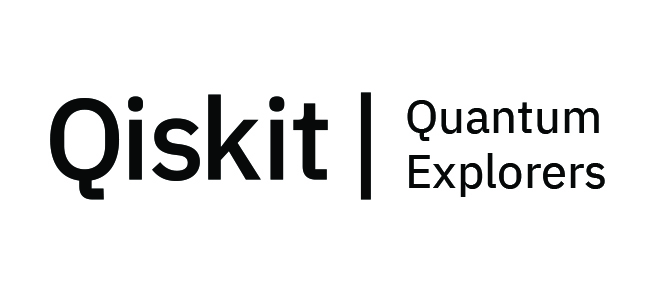

#  Grover's Algorithm

Let us learn about a well-known quantum algorithm called Grover's algorithm. <br/> Also, **there is a learning exercise for you to tackle on your own at the end of this tutorial.** <br/>

You may have heard that one of the advantages a quantum computer has over a classical computer is its superior speed searching databases.<br/>
Grover's algorithm demonstrates this capability. This algorithm can speed up an unstructured search problem quadratically (a classical computation requires on the order of $N$ steps to search $N$ entries problem, while a quantum computer requires just $\sqrt{N}$), but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

This page will walk you through the description of the search problem, building the oracle - the circuit representation of our search problem, and implementing the complete Grover algorithm in Qiskit.

# Unstructured search
Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner, ${w}$. Think of each item in the list as a box of a particular item. Say all items in the list have grey colored items except the winning item.

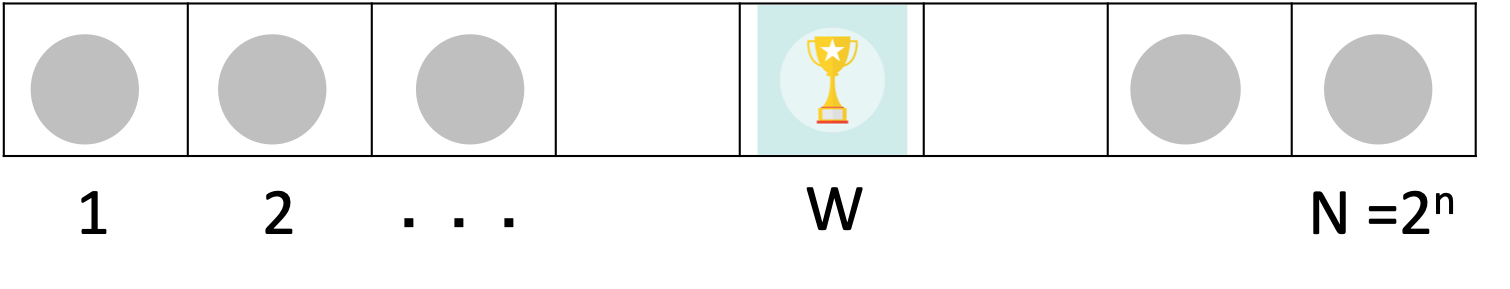"

To find the winning item -- the marked item -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.

# Creating an oracle that marks the winning item
How will the list items be provided to the quantum computer? A common way to encode such a list is in terms of a function $f$ that returns $f(x)=0$ for all unmarked items $x$, and $f(w)=1$ for the winner. To use a quantum computer for this problem, we must provide the items in superposition to this function, so we encode the function into a unitary matrix called an **oracle**. First, we choose a binary encoding of the items $x,w \in \{0,1\}^n$ so that $N=2^n$. This way, we can represent it in terms of qubits on a quantum computer. We then define the oracle matrix $U_w$ to act on any of the simple, standard basis states $|x\rangle$ by $U_w |x\rangle = (-1)^{f(x)}|x\rangle$

We see that if $x$ is an unmarked item, the oracle does nothing to the state. However, when we apply the oracle to the basis state $|w\rangle$, it maps $U_w |w\rangle = -|w\rangle$. Geometrically, this unitary matrix corresponds to a reflection about the origin for the marked item in an $N=2^n$-dimensional vector space.

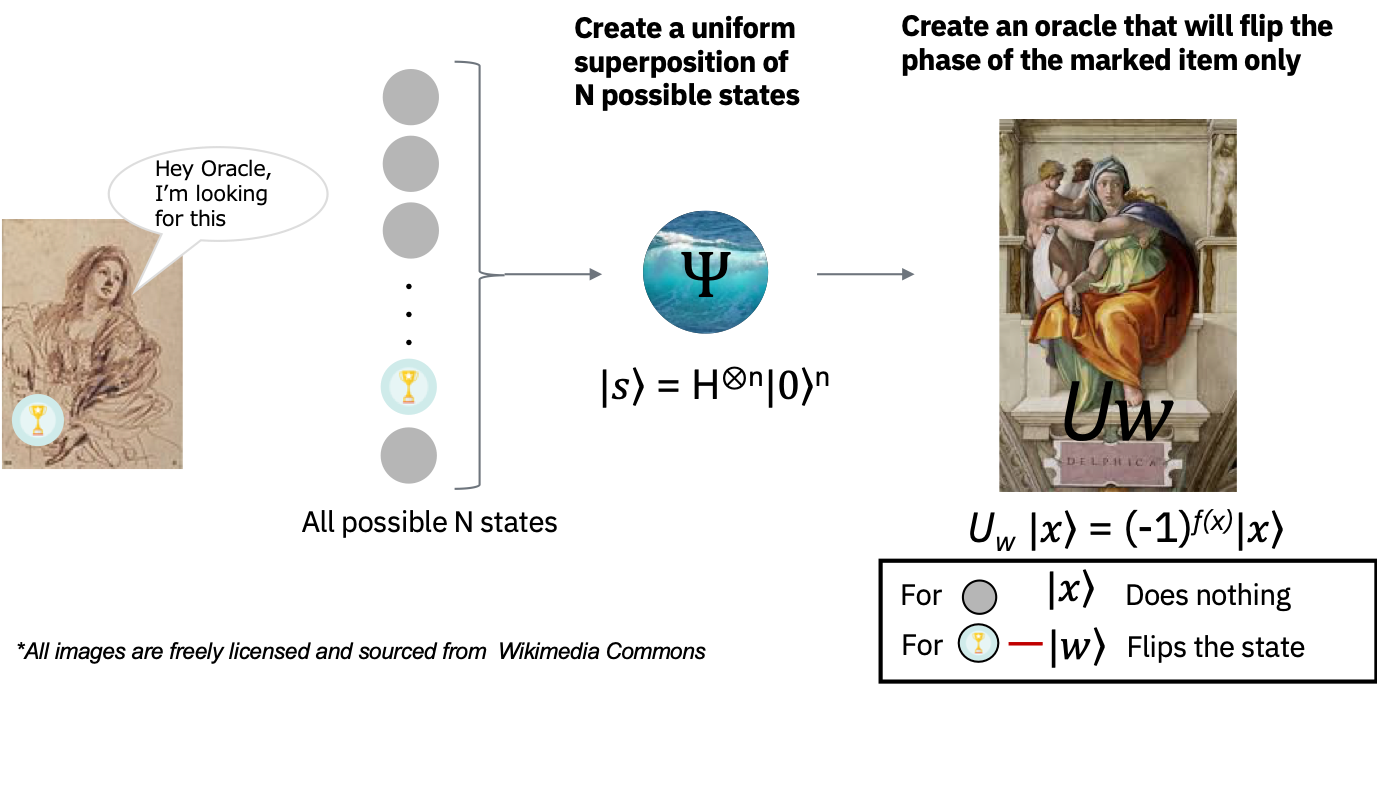

# Amplitude amplification
So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other. You may have heard the term superposition. This can be expressed in terms of a uniform superposition: <br/>
$$|s\rangle = \frac{1}{\sqrt N}\sum_{x=0}^{N-1} |x\rangle $$

If at this point we were to measure in the standard basis $|x\rangle$, this superposition would collapse to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^{n}} $. Our chances of guessing the right value $|w\rangle$ is therefore $\frac{1}{2^{n}}$, as could be expected. Hence, on average we would need to try about $N=2^{n}$ times to guess the correct item.

Now, let's enter the procedure called amplitude amplification, which is how a quantum computer significantly enhances the probability of finding the correct item. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitudes, so that measuring the final state will return the right item with near-certainty.

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the winner $|w\rangle$ and the uniform superposition $|s\rangle$ . These two vectors span a two-dimensional plane in the vector space $\mathbb C^{N}$ . They are not quite perpendicular because $|w\rangle$ occurs in the superposition with amplitude $N^{-1/2}$ as well.

We can, however, introduce an additional state $|s'\rangle$ that is in the span of these two vectors, is perpendicular to $|w\rangle$, and is obtained from $|s\rangle$ by removing $|w\rangle$ and rescaling.


**Step 0** :
The amplitude amplification procedure starts out in the uniform superposition $|s\rangle$ .  The uniform superposition is easily constructed from $|s\rangle = H^{\otimes n}|0\rangle^{n}$. At $t=0$, the initial state is $|\psi_{0}\rangle = |s\rangle$.

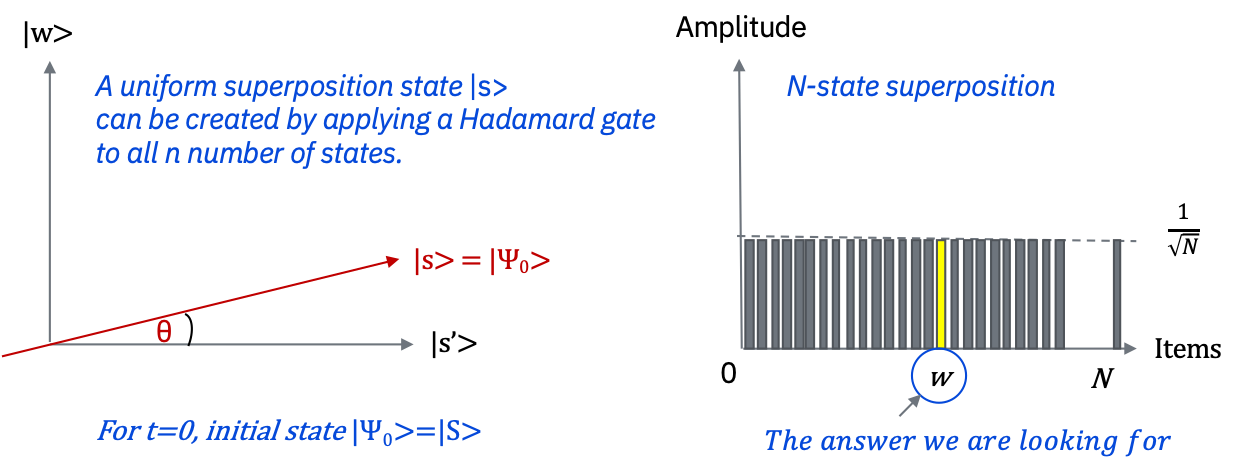

**Step 1** :
We apply the oracle reflection $U_{w}$ to the state $U_{w}|\psi_{t}\rangle = |\psi_{t'}\rangle$.

<img src=" 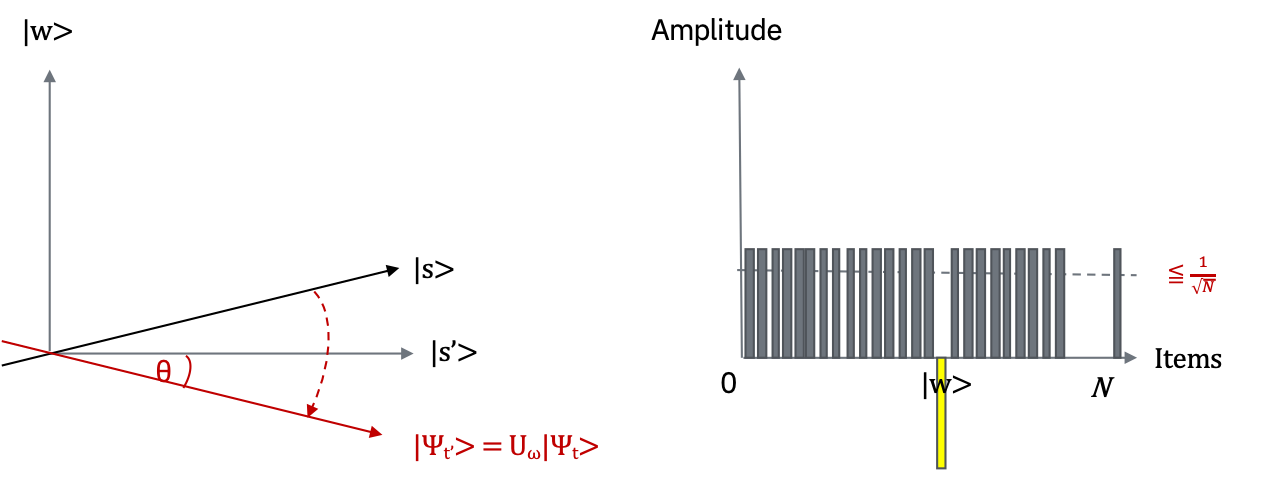" />

Geometrically, this corresponds to a reflection of the state $|\psi_{t}\rangle$ about  $|s'\rangle$ . This transformation means that the amplitude in front of the $|w\rangle$ state becomes negative, which in turn means that the average amplitude has been lowered. (Note how the dotted line in the right graph is decreasing).

**Step 2**:
We now apply an additional reflection $U_{s}$ about the state $|s\rangle$: $U_{s} = 2|s\rangle \langle s| - 1 $ . This transformation maps the state to $U_{s}|\psi_{t'}\rangle$ and completes the transformation $|\psi_{t+1}\rangle = U_{s}U_{w}|\psi_{t}\rangle$ .（Note how the amplitude at $|w\rangle$ is amplified in the right graph).

<img src=" 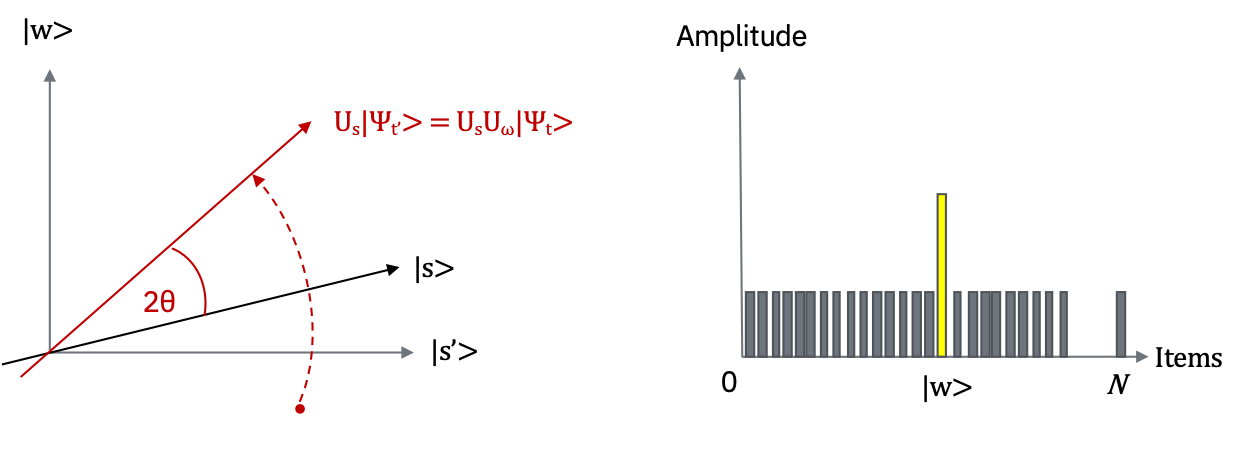" />

Two reflections always correspond to a rotation. The transformation $ U_{s}U_{w}$ rotates the initial state $|s\rangle$ closer toward the winner $|w\rangle$ . Notice the left graph in Step 2. The action of the reflection $U_{s}$ in the amplitude bar diagram can be understood as a reflection about the average amplitude. Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w\rangle$ to roughly three times its original value, while it decreases the other amplitudes. We then go to **Step １** to repeat the application. This procedure will be repeated several times to zero in on the winner. 

After $t$ steps, the state will have transformed to $|\psi_{t}\rangle = (U_{s}U_{w})^{t}|\psi_{0}\rangle$.

How many times do we need to apply the rotation? It turns out that roughly $\sqrt N$ rotations suffice. This becomes clear when looking at the amplitudes of the state $|\psi_{t}\rangle$ . We can see that the amplitude of $|w\rangle$ grows linearly with the number of applications（$ \sim tN^{1/2}$）. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

If there are multiple solutions, $M$, it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.

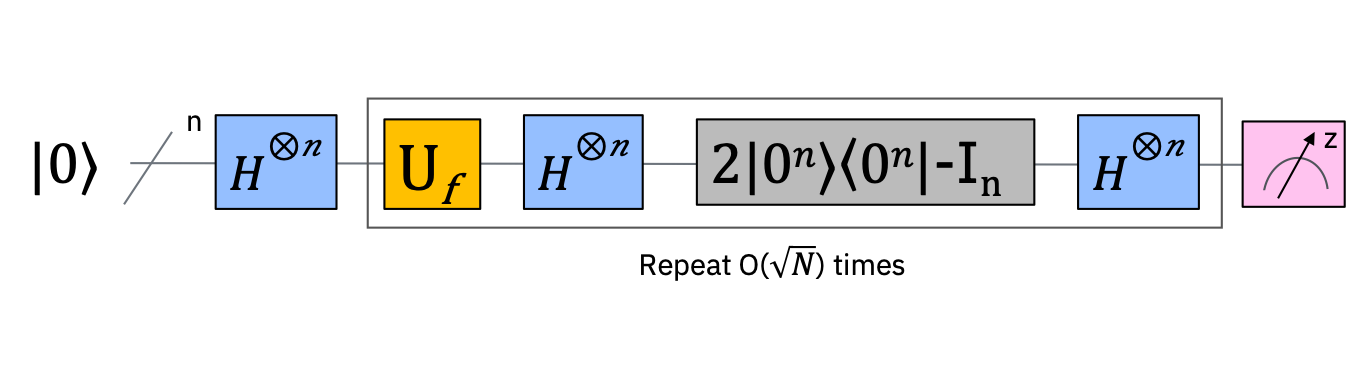

### Qiskit implementation: Grover's algorithm using two qubits
Now, let's impement Grover's algorithm using Qiskit. In this example, we will use two qubits to find the state $|11\rangle$.

First we prepare our environment.

In [7]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

As we have seen in Step1, let us create a phase oracle to mark the state $|11\rangle$.

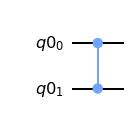

In [8]:
def phase_oracle(circuit, register):
    circuit.cz(register[0], register[1])

qr = QuantumRegister(2)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")

Next, we set up the circuit for inversion about the average as we saw in Step 2. This circuit is sometimes called an amplitude ampification module or a diffusion circuit.

In [9]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

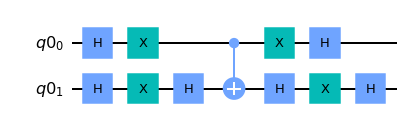

In [10]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr)
qAverage.draw(output='mpl')

Now we put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement at the end. Note that since there is one solution and four possibilities, we will only need to run one iteration.

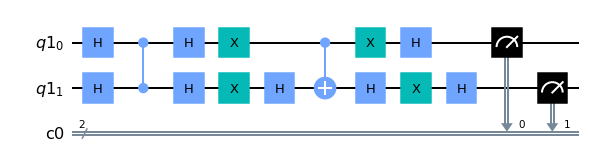

In [11]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

phase_oracle(groverCircuit, qr)
inversion_about_average(groverCircuit, qr)

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

### Experiment with simulators
We now run the above circuit on the simulator.

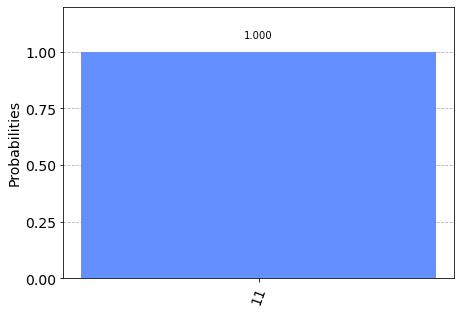

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(groverCircuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

As we can see, the algorithm discovers our marked states.

### Experiment with real devices
We can run the circuit on the real device as shown below.

In [13]:
# Load our saved IBMQ accounts and get the least busy backend device

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend_lb = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibm_nairobi


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

device = backend_lb
transpiled_grover_circuit = transpile(groverCircuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job is queued (7)     

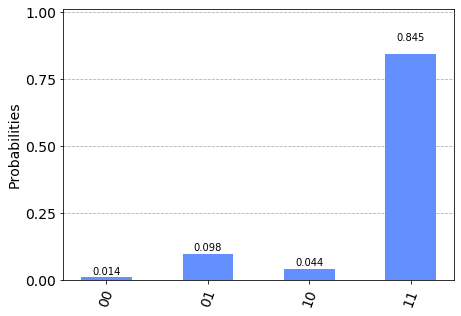

In [15]:
# get the results from the computation
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)

### Qiskit implementation: 2 qubit Grover's algorithm using auxiliary bits
We are going to find the state $|11\rangle$ just like in the previous example, but this time we will use an auxiliary bit. Auxiliary bits let you work with more qubits or implement more complex oracles.

Let us prepare the environment first.

In [14]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

We will create an oracle that will flip the phase of the answer we are looking for ( in this case $|11\rangle$ ). This time, using the auxiliary bit to make the target bit's phase flip when the input state is $|11\rangle$ . Note that in order to make this phase flip work, you need to prepare the auxiliary bit to be $|1\rangle$ by using an x gate.

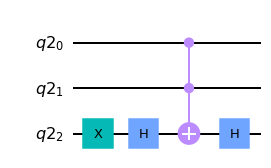

In [15]:
def phase_oracle(circuit, register,oracle_register):
    circuit.h(oracle_register)
    circuit.ccx(register[0], register[1],oracle_register)
    circuit.h(oracle_register)
    
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

Next, we prepare the amplitude amplification module/diffusion circuit. Make sure that the circuit does not act on the auxiliary bit.

In [16]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

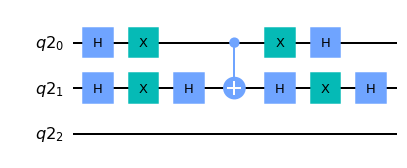

In [17]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr[0:2])
qAverage.draw(output='mpl')

Just like we did in the previous example without using the auxiliary bit, we first create a uniform superposition by using the Hadamard (H gate) , incorporate the transformation and then take measurement. Again, make sure that you do not apply the H gate to your auxiliary bit.

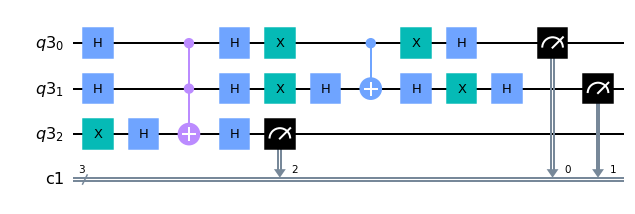

In [18]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

### Experiment with simulators
We now run this circuit on a simulator. Make sure to specify 'qasm_simulator' as your backend. 

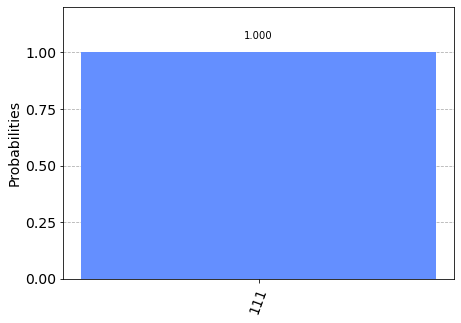

In [20]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(groverCircuit, aer_sim)
qobj = assemble(groverCircuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

We can see how the state $|11\rangle$ is being amplified just like we saw previously without using the auxiliary bit. You can ignore the 1 in the highest order, as that comes from the auxiliary bit. 

## Tips: Number of iterations
I mentioned that the number of Grover algorithm iterations to be performed before the solution is fully amplified is approximately $\sqrt{N}$. Let's go further and think about the number of times the solution is amplified the most.

For example, when running Grover's algorithm on a database with $N = 2^4$, the probabilities obtained by changing the number of iterations are as follows.

In [25]:
prob_of_ans = []

for x in range(12):
    database = QuantumRegister(4)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(2) 
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_4q
        # search 7: 0111 
        qc.x(database[0])
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic') 
        qc.x(database[0])

    # diffusion_4q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[3])
        qc.mct(database[0:3], database[3], auxiliary[:], mode='basic')
        qc.h(database[3])
        qc.x(database[:])
        qc.h(database[:])


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    # Change the endian 
    qc = qc.reverse_bits() 
    
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, aer_sim)
    qobj = assemble(transpiled_qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()
    answer = counts['0111']
    prob_of_ans.append(answer)

Text(0, 0.5, '# of times the solution was obtained')

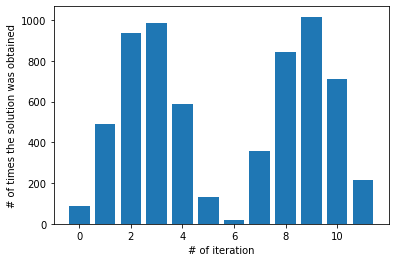

In [26]:
import numpy as np
import matplotlib.pyplot as plt
iteration = [i for i in range(12)]
correct = prob_of_ans
plt.bar(iteration, correct)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')